In [509]:
import pandas as pd
import matplotlib.pyplot as plt

In [630]:
# Assuming 'surveillance_data.xlsx' is your Excel file
xls = pd.ExcelFile('../dat/surveillance_data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = xls.sheet_names

# Read each sheet into a separate DataFrame and store them in a list
dfs = [pd.read_excel(xls, sheet_name) for sheet_name in sheet_names]

# Add a 'Year' column to each DataFrame
for i in range(len(dfs)):
    dfs[i]['Year'] = sheet_names[i].replace('_surveillance', '')
 
# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Convert the 'Year' column to datetime index
data['Year'] = data['Year'].astype(int)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

1. Trend visualisation:

In [631]:
data

,paragraph,subparagraph,description,description_en,BW,BY,BE,BB,HB,HH,...,NI,NW,RP,SL,SN,ST,SH,TH,GBA,overall
Year,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,3.1,§ 100a Abs. 1 StPO,§ 100a paragraph 1 StPO,564,1203.0,302,81,24,205,...,584,274,270,44,243,129,294,81,53,5174
2021-01-01,4,4.1,Erstanordnungen,Initial orders,1483,3243.0,1044,163,113,629,...,1249,848,332,62,417,279,776,174,517,13977
2021-01-01,4,4.2,Verlängerungsanordnungen,Extension Orders,346,629.0,253,44,16,141,...,242,192,106,25,67,88,134,68,183,3248
2021-01-01,5,5.1,im richterlichen Beschlussangeordnet,ordered in a court order,2,0.0,4,0,0,5,...,0,20,0,0,0,0,0,1,1,35
2021-01-01,5,5.2,Tatsächlich durchgeführt,Actually done,1,0.0,3,0,0,0,...,0,16,0,0,0,0,0,0,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01,4,4.2,Verlängerungsanordnungen,NaN,289,274.0,496,49,43,371,...,279,160,100,28,89,109,55,70,98,3047
2009-01-01,4,4.1,Erstanordnungen,NaN,1874,2935.0,667,475,399,1102,...,2011,1607,447,102,772,348,325,211,290,17208
2009-01-01,4,4.2,Verlängerungsanordnungen,NaN,340,382.0,439,131,46,380,...,376,193,46,18,105,48,21,55,157,3150


In [632]:
#We only analyse pargraph 4 as these are the actual surveillance Orders
data_paragraph4 = data[data['paragraph'].isin([4])]
data_yearly = data_paragraph4
data_yearly.drop(['description', 'description_en', 'overall','paragraph', 'GBA'], axis=1, inplace=True)
data_yearly['mean'] = data_yearly.mean(axis=1, numeric_only=True).round().astype(int)

/var/folders/81/7cc4l6x15vn92s_3hb78hbr40000gn/T/ipykernel_76925/2241665303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yearly.drop(['description', 'description_en', 'overall','paragraph', 'GBA'], axis=1, inplace=True)
/var/folders/81/7cc4l6x15vn92s_3hb78hbr40000gn/T/ipykernel_76925/2241665303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yearly['mean'] = data_yearly.mean(axis=1, numeric_only=True).round().astype(int)


In [633]:
#data_yearly_transposed.columns = ['state', 2013,  2016,  2019,  2020, 2021]
print(data_yearly)
print(data_yearly.index)

           subparagraph    BW      BY    BE   BB   HB    HH    HE   MV    NI  \
Year                                                                           
2021-01-01          4.1  1483  3243.0  1044  163  113   629  2425  223  1249   
2021-01-01          4.2   346   629.0   253   44   16   141   654   60   242   
2020-01-01          4.1  1621  3216.0  1087  193  122   802  2397  310  1009   
2020-01-01          4.2   249   460.0   271   74   21   147   710   43   224   
2019-01-01          4.1  1824  3618.0  1323  106  198   726  2695  296  1331   
2019-01-01          4.2   330   565.0   269   30   28   146   138   52   359   
2018-01-01          4.1  1832  3408.0  1462  218  165   818  2670  334  1332   
2018-01-01          4.2   319   605.0   325   43   62   174   739   98   346   
2017-01-01          4.1  2016  3616.0  1664  160  221   827  1122  354  1410   
2017-01-01          4.2   328   622.0   229   66   16   110   248   89   365   
2016-01-01          4.1  1777  3512.0  1

In [634]:
population = pd.read_csv('../dat/12411-0010-DLAND_$F.csv', sep=';', skiprows=5, skipfooter=4, engine='python')
population['state'] = ['BW', 'BY', 'BE', 'BB', 'HB', 'HH', 'HE', 'MV', 'NI', 'NW', 'RP', 'SL', 'SN', 'ST', 'SH', 'TH']
population.drop(['Unnamed: 0'], axis=1, inplace=True)
population.columns = population.columns.str.replace('31.12.', '')
population

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,state
0,10524415,10600906,10661320,10692556,10717419,10735701,10738753,10749755,10749506,10744921,...,10716644,10879618,10951893,11023425,11069533,11100394,11103043,11124642,11280257,BW
1,12230255,12329714,12387351,12423386,12443893,12468726,12492658,12520332,12519728,12510331,...,12691568,12843514,12930751,12997204,13076721,13124737,13140183,13176989,13369393,BY
2,3382169,3388434,3392425,3388477,3387828,3395189,3404037,3416255,3431675,3442675,...,3469849,3520031,3574830,3613495,3644826,3669491,3664088,3677472,3755251,BE
3,2601962,2593040,2582379,2574521,2567704,2559483,2547772,2535737,2522493,2511525,...,2457872,2484826,2494648,2504040,2511917,2521893,2531071,2537868,2573135,BB
4,660225,659651,662098,663129,663213,663467,663979,663082,661866,661716,...,661888,671489,678753,681032,682986,681202,680130,676463,684864,HB
5,1715392,1726363,1728806,1734083,1734830,1743627,1754182,1770629,1772100,1774224,...,1762791,1787408,1810438,1830584,1841179,1847253,1852478,1853935,1892122,HH
6,6068129,6077826,6091618,6089428,6097765,6092354,6075359,6072555,6064953,6061951,...,6093888,6176172,6213088,6243262,6265809,6288080,6293154,6295017,6391360,HE
7,1775703,1759877,1744624,1732226,1719653,1707266,1693754,1679682,1664356,1651216,...,1599138,1612362,1610674,1611119,1609675,1608138,1610774,1611160,1628378,MV
8,7926193,7956416,7980472,7993415,8000909,7993946,7982685,7971684,7947244,7928815,...,7826739,7926599,7945685,7962775,7982448,7993608,8003421,8027031,8140242,NI
9,18009865,18052092,18076355,18079686,18075352,18058105,18028745,17996621,17933064,17872763,...,17638098,17865516,17890100,17912134,17932651,17947221,17925570,17924591,18139116,NW


In [635]:
population.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', 'state'],
      dtype='object')

In [636]:

population = pd.melt(population, id_vars=['state'], value_vars=population.columns[1:])
population.columns = ['state', 'year', 'population']
population['year'] = population.year.astype('int64')
print(population)
population.index

    state  year  population
0      BW  2001    10600906
1      BY  2001    12329714
2      BE  2001     3388434
3      BB  2001     2593040
4      HB  2001      659651
..    ...   ...         ...
347    SL  2022      992666
348    SN  2022     4086152
349    ST  2022     2186643
350    SH  2022     2953270
351    TH  2022     2126846

[352 rows x 3 columns]


RangeIndex(start=0, stop=352, step=1)

In [637]:
# Reshape data_yearly from wide format to long format
data_yearly_melted = data_yearly.reset_index().melt(id_vars='Year', var_name='state', value_name='count')

# Convert the 'Year' column to datetime and then to int64 to match population
data_yearly_melted['year'] = pd.to_datetime(data_yearly_melted['Year']).dt.year

# Merge data_yearly_melted and population
merged_df = pd.merge(data_yearly_melted, population, how='inner', on=['state', 'year'])
# Copy the 'count' value of every second row into a new column of the row before
merged_df['count4.2'] = merged_df['count'].shift(-1)

# Remove every second row
merged_df = merged_df.iloc[::2]
merged_df

,Year,state,count,year,population,count4.2
0,2021-01-01,BW,1483,2021,11124642,346
2,2020-01-01,BW,1621,2020,11103043,249
4,2019-01-01,BW,1824,2019,11100394,330
6,2018-01-01,BW,1832,2018,11069533,319
8,2017-01-01,BW,2016,2017,11023425,328
...,...,...,...,...,...,...
438,2012-01-01,TH,319,2012,2170460,40
440,2011-01-01,TH,372,2011,2181603,51
442,2010-01-01,TH,335,2010,2235025,70
444,2009-01-01,TH,211,2009,2249882,55


In [638]:
# Group the data by year and calculate the sum of counts and population
ger_data = merged_df.groupby('year').agg({'count': 'sum', 'count4.2': 'sum', 'population': 'sum'}).reset_index()

# Add a new column 'state' with the value 'GER'
ger_data['state'] = 'GER'

# Append ger_data to merged_df
merged_df = pd.concat([merged_df, ger_data], ignore_index=True)

merged_df

,Year,state,count,year,population,count4.2
0,2021-01-01,BW,1483,2021,11124642,346
1,2020-01-01,BW,1621,2020,11103043,249
2,2019-01-01,BW,1824,2019,11100394,330
3,2018-01-01,BW,1832,2018,11069533,319
4,2017-01-01,BW,2016,2017,11023425,328
...,...,...,...,...,...,...
233,NaT,GER,14976.0,2017,82792351,2779.0
234,NaT,GER,15106.0,2018,83019213,3530.0
235,NaT,GER,14617.0,2019,83166711,2449.0
236,NaT,GER,13973.0,2020,83155031,2921.0


In [639]:
merged_df['count'] = merged_df['count'].astype(int)
merged_df['count4.2'] = merged_df['count4.2'].astype(int)
merged_df['count_sum'] = merged_df['count'] + merged_df['count4.2']
merged_df.dtypes

Year          datetime64[ns]
state                 object
count                  int64
year                   int32
population             int64
count4.2               int64
count_sum              int64
dtype: object

In [640]:
#divide count by population
merged_df['count_norm'] = (merged_df['count'] / merged_df['population'] * 100_000).round(5)
merged_df['count4.2_norm'] = (merged_df['count4.2'] / merged_df['population'] * 100_000).round(5)
merged_df['count_sum_norm'] = (merged_df['count_sum'] / merged_df['population'] * 100_000).round(5)
# Sort the DataFrame in place
merged_df.sort_values(by='population', ascending=False, inplace=True)
merged_df

,Year,state,count,year,population,count4.2,count_sum,count_norm,count4.2_norm,count_sum_norm
237,NaT,GER,13460,2021,83237124,3065,16525,16.17067,3.68225,19.85292
235,NaT,GER,14617,2019,83166711,2449,17066,17.57554,2.94469,20.52023
236,NaT,GER,13973,2020,83155031,2921,16894,16.80355,3.51272,20.31627
234,NaT,GER,15106,2018,83019213,3530,18636,18.19579,4.25203,22.44782
233,NaT,GER,14976,2017,82792351,2779,17755,18.08863,3.35659,21.44522
...,...,...,...,...,...,...,...,...,...,...
68,2009-01-01,HB,399,2009,661716,46,445,60.29777,6.95162,67.24939
67,2010-01-01,HB,281,2010,660706,43,324,42.53026,6.50819,49.03845
64,2013-01-01,HB,263,2013,657391,48,311,40.00663,7.30159,47.30822
65,2012-01-01,HB,310,2012,654774,86,396,47.34458,13.13430,60.47888


In [641]:
# Get the unique values of the 'state' column
unique_states = merged_df['state'].unique()
unique_states

array(['GER', 'NW', 'BY', 'BW', 'NI', 'HE', 'SN', 'RP', 'BE', 'SH', 'BB',
       'ST', 'TH', 'HH', 'MV', 'SL', 'HB'], dtype=object)

In [642]:
ger_data = merged_df[merged_df['state'].isin(['GER'])]
ger_data.index = ger_data['year']
ger_data

,Year,state,count,year,population,count4.2,count_sum,count_norm,count4.2_norm,count_sum_norm
year,,,,,,,,,,
2021,NaT,GER,13460,2021,83237124,3065,16525,16.17067,3.68225,19.85292
2019,NaT,GER,14617,2019,83166711,2449,17066,17.57554,2.94469,20.52023
2020,NaT,GER,13973,2020,83155031,2921,16894,16.80355,3.51272,20.31627
2018,NaT,GER,15106,2018,83019213,3530,18636,18.19579,4.25203,22.44782
2017,NaT,GER,14976,2017,82792351,2779,17755,18.08863,3.35659,21.44522
2016,NaT,GER,16825,2016,82521653,3602,20427,20.38859,4.36491,24.75350
2015,NaT,GER,17901,2015,82175684,3772,21673,21.78382,4.59017,26.37398
2008,NaT,GER,13532,2008,82002356,2280,15812,16.50196,2.78041,19.28237
2009,NaT,GER,16918,2009,81802257,2993,19911,20.68158,3.65882,24.34040


In [643]:
#transfrom to wide format
merged_df_wide = merged_df.pivot(index='state', columns='year', values='count_sum_norm')
merged_df_wide

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
state,,,,,,,,,,,,,,
BB,3.01289,24.12877,16.37856,20.50400,9.75705,11.79981,19.89526,12.63670,11.54471,9.02541,10.39047,5.39277,10.54889,8.15645
BE,30.50988,32.12618,38.66242,27.45037,66.57340,59.79258,56.89008,57.64154,49.76460,52.38696,49.02840,43.38476,37.06243,35.26879
BW,20.68002,20.60508,19.38835,21.33662,18.22291,20.62781,19.07314,16.77449,18.95563,21.26381,19.43171,19.40472,16.84223,16.44098
BY,17.84384,26.51409,28.14487,32.33046,32.69281,27.64942,31.25697,32.40546,32.92926,32.60701,30.68812,31.87111,27.97526,29.38456
GER,19.28237,24.34040,24.41665,25.38844,27.89364,27.71908,28.15726,26.37398,24.75350,21.44522,22.44782,20.52023,20.31627,19.85292
HB,71.16244,67.24939,49.03845,60.56592,60.47888,47.30822,46.83572,52.86758,47.14528,34.80013,33.23641,33.17665,21.02539,19.06978
HE,37.90631,60.62405,67.10048,60.31261,81.54268,87.80193,87.26777,56.78275,55.54404,21.94366,54.40638,45.05350,49.37111,48.91170
HH,61.22679,83.52948,83.40573,88.52354,94.39119,67.28350,73.68996,77.48651,73.35242,51.18585,53.87852,47.20523,51.22868,41.53328
MV,20.90899,23.07390,27.33926,30.36905,36.18011,40.83921,24.57574,33.18113,19.80537,27.49642,26.83772,21.63993,21.91493,17.56498


In [644]:
# Convert the index to a categorical type with the categories ordered by 'my_array'
merged_df_wide.index = pd.Categorical(merged_df_wide.index, categories=unique_states, ordered=True)

# Sort the DataFrame by the categorical index
merged_df_wide.sort_index(inplace=True)

In [645]:
german_mean = merged_df_wide.loc['GER']
german_mean.index = merged_df_wide.columns
data_yearly_transposed = merged_df_wide.drop('GER')

In [646]:
data_yearly_transposed.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021],
      dtype='int32', name='year')

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


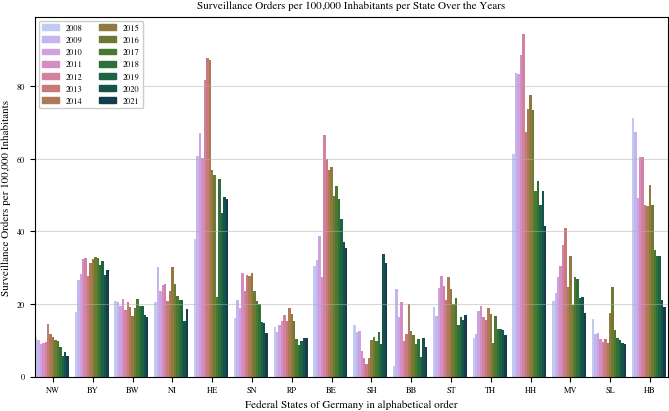

In [659]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tueplots import bundles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))


# Create a list of x coordinates for the bars
x = range(len(data_yearly_transposed.index))
bar_width = 0.065


# Create a color map
colors = cm.cubehelix_r(np.linspace(0.2, 0.8, len(data_yearly_transposed.columns)))
fig, ax = plt.subplots(1,1)

# Create a list to store the patches for the legend
legend_patches = []

# Create a bar plot for each column
for i, (year, color) in enumerate(zip(data_yearly_transposed.columns, colors)):
    ax.bar([xi*(1+bar_width) + i*bar_width for xi in x], data_yearly_transposed[year], width=bar_width, label=year, color=color)
    
    # Draw a horizontal line at the mean value
    print(year)
    #ax.axhline(german_mean[year], color=color, linestyle='solid',alpha=0.6, linewidth=1,)

    # Create a patch for the legend
    legend_patches.append(Patch(color=color, label=year))

# Add a line to the legend for the mean
#legend_patches.append(Line2D([0], [0], color=color, lw=1, linestyle='-', label='Mean of germany per year'))

# Set the labels of the x-axis, y-axis and title
ax.set_xlabel('Federal States of Germany (sorted by population)')
ax.set_ylabel('Surv. Orders per 100.000 Inhabitants')
ax.set_title('Surveillance Orders per 100.000 Inhabitants per State over the years')

# Set the x-ticks to be the states and rotate them
# Set the x-ticks to be the states and rotate them
plt.xticks([xi*(1+bar_width) + 0.5*len(data_yearly_transposed.columns)*bar_width for xi in x], data_yearly_transposed.index, rotation=0)
ax.grid(which="major", axis="y", alpha=0.5)
# Set the x-axis limits
ax.set_xlim(x[0]*(1+bar_width) - 0.5*bar_width, x[-1]*(1+bar_width) + (len(data_yearly_transposed.columns)+0.5)*bar_width)

# Display the legend
ax.legend(handles=legend_patches, loc="upper left", framealpha=1, facecolor="white", ncol=2)
plt.savefig('../doc/fig/trend.pdf')
plt.show()

In [648]:
ger_data

,Year,state,count,year,population,count4.2,count_sum,count_norm,count4.2_norm,count_sum_norm
year,,,,,,,,,,
2021,NaT,GER,13460,2021,83237124,3065,16525,16.17067,3.68225,19.85292
2019,NaT,GER,14617,2019,83166711,2449,17066,17.57554,2.94469,20.52023
2020,NaT,GER,13973,2020,83155031,2921,16894,16.80355,3.51272,20.31627
2018,NaT,GER,15106,2018,83019213,3530,18636,18.19579,4.25203,22.44782
2017,NaT,GER,14976,2017,82792351,2779,17755,18.08863,3.35659,21.44522
2016,NaT,GER,16825,2016,82521653,3602,20427,20.38859,4.36491,24.75350
2015,NaT,GER,17901,2015,82175684,3772,21673,21.78382,4.59017,26.37398
2008,NaT,GER,13532,2008,82002356,2280,15812,16.50196,2.78041,19.28237
2009,NaT,GER,16918,2009,81802257,2993,19911,20.68158,3.65882,24.34040


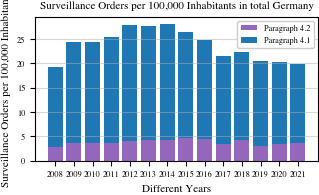

In [649]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tueplots import bundles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))


fig, ax = plt.subplots(1,1)

ax.bar(ger_data.index, ger_data['count4.2_norm'], color='tab:purple', label='Paragraph 4.2')
ax.bar(ger_data.index, ger_data.count_norm, bottom=ger_data['count4.2_norm'], color='tab:blue', label='Paragraph 4.1')

# Set the labels of the x-axis, y-axis and title
ax.set_xlabel('Different Years')
ax.set_ylabel('Surveillance Orders per 100,000 Inhabitants')
ax.set_title('Surveillance Orders per 100,000 Inhabitants in total Germany')

# Set the x-ticks to be the states and rotate them
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.xticks(years, years, rotation=0)
ax.grid(which="major", axis="y", alpha=0.5)

# Display the legend
ax.legend(loc="upper right", framealpha=1, facecolor="white")
plt.savefig('../doc/fig/trend_ger.pdf')
plt.show()

In [650]:
mobile_data = pd.read_csv('../dat/mobile_user_germany.csv', sep=';', header=0)
mobile_data.head()

,Quartal,Jahr,Gesamt
0,3.0,2023,180251000
1,2.0,2023,177443000
2,1.0,2023,173915000
3,4.0,2022,168998000
4,3.0,2022,169441000


In [651]:
# Select rows where 'Jahr' is between 2008 and 2021 and create a copy
selected_data = mobile_data[mobile_data['Jahr'].between(2008, 2021)].copy()
selected_data = selected_data[selected_data['Quartal'].isin([4])]

# Now you can safely modify selected_data
selected_data['Quartal'] = selected_data['Quartal'].astype(int) 
selected_data['Date'] = pd.to_datetime(selected_data['Jahr'].astype(str) + '-' + '12' + '-31')
selected_data.set_index('Date', inplace=True)
selected_data.drop(['Jahr', 'Quartal'], axis=1, inplace=True)
selected_data.head()

,Gesamt
Date,
2021-12-31,161312000
2020-12-31,150001000
2019-12-31,140716000
2018-12-31,134521000
2017-12-31,132280000


In [652]:
# Convert the index to DateTime index
ger_data.index = pd.to_datetime(ger_data.index, format='%Y')

# Shift the dates to the last day of the year
ger_data.index = ger_data.index + pd.offsets.YearEnd(1)
ger_data.index

DatetimeIndex(['2021-12-31', '2019-12-31', '2020-12-31', '2018-12-31',
               '2017-12-31', '2016-12-31', '2015-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2014-12-31', '2013-12-31',
               '2012-12-31', '2011-12-31'],
              dtype='datetime64[ns]', name='year', freq=None)

In [653]:
selected_data.index

DatetimeIndex(['2021-12-31', '2020-12-31', '2019-12-31', '2018-12-31',
               '2017-12-31', '2016-12-31', '2015-12-31', '2014-12-31',
               '2013-12-31', '2012-12-31', '2011-12-31', '2010-12-31',
               '2009-12-31', '2008-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

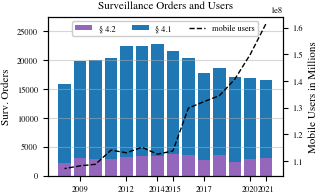

In [654]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tueplots import bundles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))


fig, ax = plt.subplots(1,1)
# Create a second y-axis

base = ax.bar(ger_data.index.year, ger_data['count4.2'], color='tab:purple', label='§ 4.2')
top = ax.bar(ger_data.index.year, ger_data['count'], bottom=ger_data['count4.2'], color='tab:blue', label='§ 4.1')

ax2 = ax.twinx()
user = ax2.plot(selected_data.index.year, selected_data['Gesamt'], linestyle='dashed',
                 color='black', linewidth=1, label='mobile users')


# Set the labels of the x-axis, y-axis and title
ax.set_title('Surveillance Orders and Users')
ax.set_ylabel('Surv. Orders')
ax2.set_ylabel('Mobile Users in Millions')

# Set the x-ticks to be the states and rotate them
plt.xticks(ger_data.index.year[::2], ger_data.index.year[::2], rotation=0)
ax.grid(which="major", axis="y", alpha=0.5)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper center" ,framealpha=1, facecolor="white", ncol=3)
ax.set_ylim([0,27500])

plt.savefig('../doc/fig/trend_and_user.pdf')
plt.show()

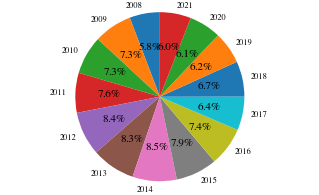

In [655]:
total = german_mean.sum()

# Assuming 'total' is a pandas Series or a list of values
labels = german_mean.index
sizes = german_mean.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [656]:
data_yearly_transposed

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
NW,10.59495,10.07119,8.97162,9.25053,9.47914,14.48339,11.81533,10.84771,9.94405,9.89832,8.20291,5.65547,6.77245,5.80208
BY,17.84384,26.51409,28.14487,32.33046,32.69281,27.64942,31.25697,32.40546,32.92926,32.60701,30.68812,31.87111,27.97526,29.38456
BW,20.68002,20.60508,19.38835,21.33662,18.22291,20.62781,19.07314,16.77449,18.95563,21.26381,19.43171,19.40472,16.84223,16.44098
NI,20.62350,30.10538,23.50254,25.22429,25.59457,20.93560,23.70080,30.05072,25.57363,22.29122,21.02112,21.14189,15.40591,18.57474
HE,37.90631,60.62405,67.10048,60.31261,81.54268,87.80193,87.26777,56.78275,55.54404,21.94366,54.40638,45.05350,49.37111,48.91170
SN,16.21828,21.03757,18.82165,28.39044,23.45561,28.04973,27.64301,28.56897,23.64163,20.70415,19.88751,15.15237,14.88806,11.97130
RP,13.70288,12.28607,14.23667,15.26303,16.84093,15.17137,18.79558,17.19797,15.27280,10.43283,8.64170,9.72177,10.49192,10.66606
BE,30.50988,32.12618,38.66242,27.45037,66.57340,59.79258,56.89008,57.64154,49.76460,52.38696,49.02840,43.38476,37.06243,35.26879
SH,14.11303,12.21740,12.52532,6.92297,5.05963,3.48017,5.19276,9.96952,10.93019,9.72379,12.28980,8.88499,33.87298,31.14300
BB,3.01289,24.12877,16.37856,20.50400,9.75705,11.79981,19.89526,12.63670,11.54471,9.02541,10.39047,5.39277,10.54889,8.15645


Internet Users are going up, while the telecommunication is decreasing....


In [657]:
# Assuming 'data' is your DataFrame
correlation = data_yearly.iloc[:, 1:-2].corr()
correlation

,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH
BW,1.000000,0.958281,0.806742,0.747274,0.869784,0.924807,0.848327,0.914209,0.942986,0.931315,0.903362,0.821656,0.922142,0.923439,0.534204
BY,0.958281,1.000000,0.860918,0.748261,0.761992,0.907899,0.853936,0.893579,0.938432,0.868870,0.891411,0.787736,0.915105,0.915960,0.556324
BE,0.806742,0.860918,1.000000,0.520687,0.613990,0.803833,0.784906,0.818070,0.809325,0.807007,0.812166,0.717577,0.838710,0.792149,0.330916
BB,0.747274,0.748261,0.520687,1.000000,0.731513,0.838083,0.810774,0.753485,0.827077,0.770519,0.782251,0.563020,0.824576,0.803732,0.313042
HB,0.869784,0.761992,0.613990,0.731513,1.000000,0.901027,0.775456,0.849504,0.893393,0.906405,0.887510,0.796299,0.871176,0.876689,0.315749
HH,0.924807,0.907899,0.803833,0.838083,0.901027,1.000000,0.908376,0.931787,0.959608,0.929055,0.956283,0.798788,0.961529,0.962083,0.387933
HE,0.848327,0.853936,0.784906,0.810774,0.775456,0.908376,1.000000,0.908245,0.867649,0.881203,0.891182,0.630043,0.897437,0.878003,0.364262
MV,0.914209,0.893579,0.818070,0.753485,0.849504,0.931787,0.908245,1.000000,0.903004,0.943596,0.919972,0.711807,0.938728,0.922479,0.372138
NI,0.942986,0.938432,0.809325,0.827077,0.893393,0.959608,0.867649,0.903004,1.000000,0.927069,0.942984,0.852092,0.955979,0.939160,0.449755
NW,0.931315,0.868870,0.807007,0.770519,0.906405,0.929055,0.881203,0.943596,0.927069,1.000000,0.951182,0.829110,0.960502,0.925909,0.366107


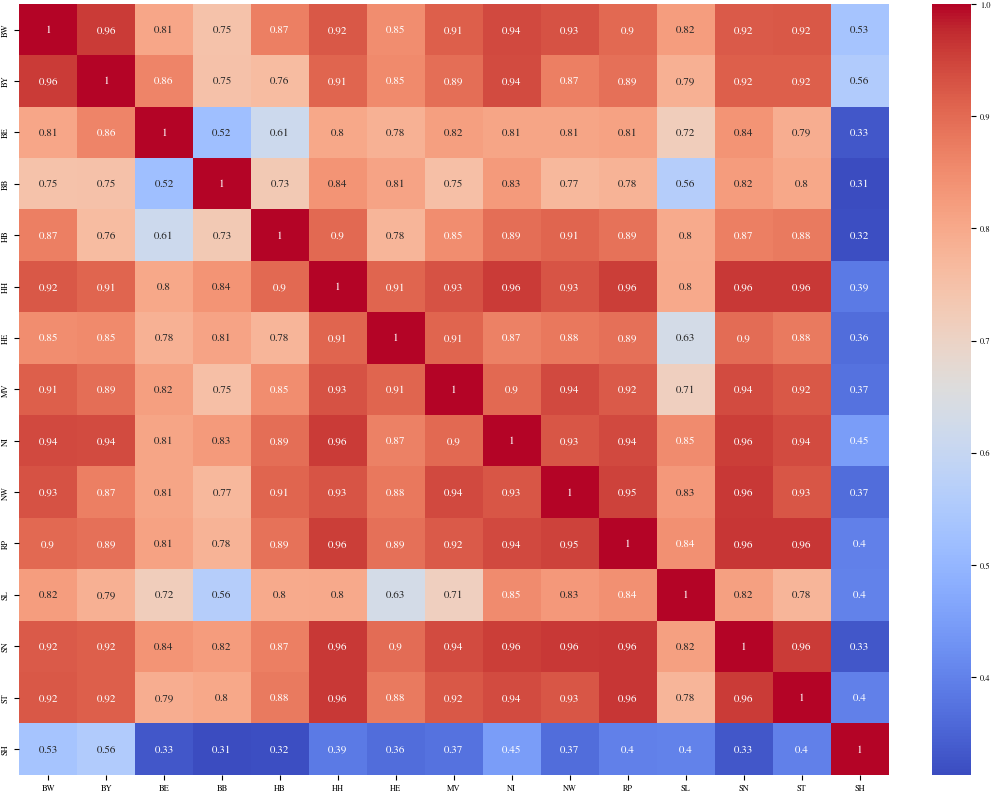

In [658]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()